<a href="https://colab.research.google.com/github/jar8-stack/secuestros_kmeans_Jorge-Serrano/blob/main/secuestros_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

El siguiente trabajo consiste en el analisis de una base de datos de secuestros a nivel federal que incluye información sobre la fecha de entrada de los casos, el sexo de la persona secuestrada, el delito inflingido a esa persona y muchos otros datos mas.

### **Fuente de datos**
Los datos utilizados provienen de la CEAV siendo estos datos publicos que se encuentran disponibles en el siguiente link.

https://datos.gob.mx/busca/dataset/dgrnvi-base-de-datos-del-registro-federal-de-victimas-refevi-o-solicitudes-recibidas-por-ano-en

# **Metodología**

Se uso el algoritmo de clasificación Kmeans el cual nos ayudo a poder procesar y clasificar los datos para poder llegar a conclusiones concretas.

In [36]:
%matplotlib inline

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [47]:
df = pd.read_csv ('refevi_20210901.csv')
df.head()

,NO,ANIO_RECEPCION,ANIO_ASIGNACION,ESTATUS,TIPO_VICTIMA,SEXO,ANIO_NACIMIENTO,ANIO_HECHO,ENTIDAD_NACIMIENTO,PAIS_NACIMIENTO,ENTIDAD_HECHOS,BIEN_JURIDICO_AFECTADO,DELITOS,VIOLACION_DDHH,DERECHO_HUMANO_VIOLENTADO
0,1,2016,2016,FOLIO ASIGNADO,DIRECTA,MUJER,1987,SIN DATO,HIDALGO,MÉXICO,SIN DATO,LA LIBERTAD PERSONAL|OTROS BIENES JURÍDICOS,SECUESTRO|OTROS DELITOS,SIN DATO,SIN DATO
1,2,2016,2016,FOLIO ASIGNADO,INDIRECTA,MUJER,1963,SIN DATO,HIDALGO,MÉXICO,SIN DATO,LA LIBERTAD PERSONAL|OTROS BIENES JURÍDICOS,SECUESTRO|OTROS DELITOS,SIN DATO,SIN DATO
2,3,2016,2016,FOLIO ASIGNADO,INDIRECTA,HOMBRE,1955,SIN DATO,HIDALGO,MÉXICO,SIN DATO,OTROS BIENES JURÍDICOS|LA LIBERTAD PERSONAL,OTROS DELITOS|SECUESTRO,SIN DATO,SIN DATO
3,4,2016,2016,FOLIO ASIGNADO,INDIRECTA,MUJER,1983,SIN DATO,HIDALGO,MÉXICO,SIN DATO,LA LIBERTAD PERSONAL|OTROS BIENES JURÍDICOS,SECUESTRO|OTROS DELITOS,SIN DATO,SIN DATO
4,5,2016,2016,FOLIO ASIGNADO,INDIRECTA,HOMBRE,1988,SIN DATO,HIDALGO,MÉXICO,SIN DATO,OTROS BIENES JURÍDICOS|LA LIBERTAD PERSONAL,OTROS DELITOS|SECUESTRO,SIN DATO,SIN DATO


In [48]:
df.describe()

,NO,ANIO_ASIGNACION
count,31228.00000,31228.000000
mean,15614.50000,2017.775138
std,9014.89144,1.737755
min,1.00000,2014.000000
25%,7807.75000,2017.000000
50%,15614.50000,2018.000000
75%,23421.25000,2019.000000
max,31228.00000,2021.000000


In [49]:
print(df.groupby('DELITOS').size())

DELITOS
ABANDONO, OMISIÓN DE CUIDADOS E INCUMPLIMIENTO DE OBLIGACIONES ALIMENTARIAS                                                                                                      2
ABANDONO, OMISIÓN DE CUIDADOS E INCUMPLIMIENTO DE OBLIGACIONES ALIMENTARIAS|OTROS DELITOS QUE ATENTAN CONTRA LA LIBERTAD PERSONAL|OTROS DELITOS CONTRA LA SALUD|OTROS DELITOS    1
ABANDONO, OMISIÓN DE CUIDADOS E INCUMPLIMIENTO DE OBLIGACIONES ALIMENTARIAS|OTROS DELITOS QUE ATENTAN CONTRA LA LIBERTAD PERSONAL|OTROS DELITOS|OTROS DELITOS CONTRA LA SALUD    1
ABIGEATO|DAÑO A LA PROPIEDAD|ROBO A CASA HABITACIÓN O INMUEBLE                                                                                                                   1
ABIGEATO|ROBO A CASA HABITACIÓN O INMUEBLE                                                                                                                                       7
                                                                                                 

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded_series = df[df.columns[:]].apply(le.fit_transform)

df= encoded_series

In [81]:
df.head()

,NO,ANIO_RECEPCION,ANIO_ASIGNACION,ESTATUS,TIPO_VICTIMA,SEXO,ANIO_NACIMIENTO,ANIO_HECHO,ENTIDAD_NACIMIENTO,PAIS_NACIMIENTO,ENTIDAD_HECHOS,BIEN_JURIDICO_AFECTADO,DELITOS,VIOLACION_DDHH,DERECHO_HUMANO_VIOLENTADO
0,0,2,2,0,1,1,79,51,12,25,25,402,1197,336,806
1,1,2,2,0,2,1,55,51,12,25,25,402,1197,336,806
2,2,2,2,0,2,0,47,51,12,25,25,595,1008,336,806
3,3,2,2,0,2,1,75,51,12,25,25,402,1197,336,806
4,4,2,2,0,2,0,80,51,12,25,25,595,1008,336,806


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


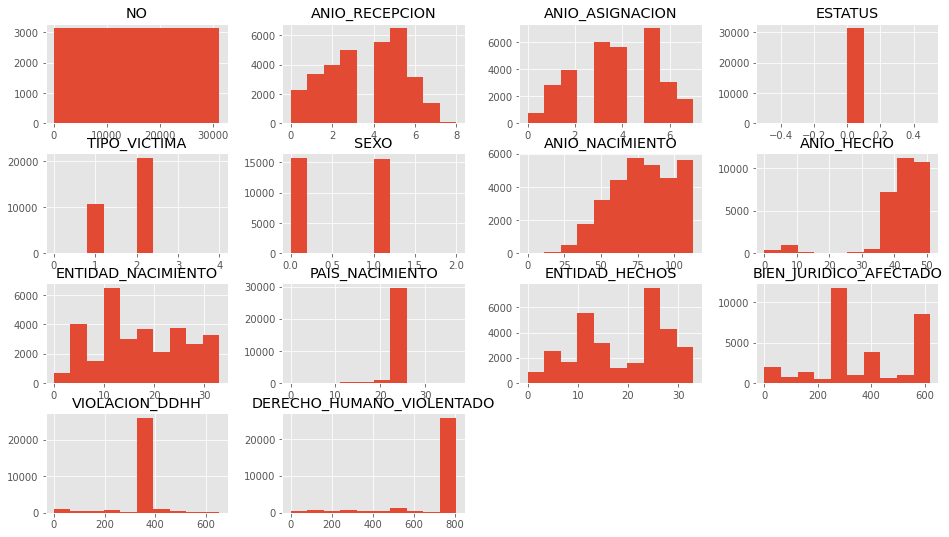

In [52]:
df.drop(['DELITOS'],1).hist()
plt.show()

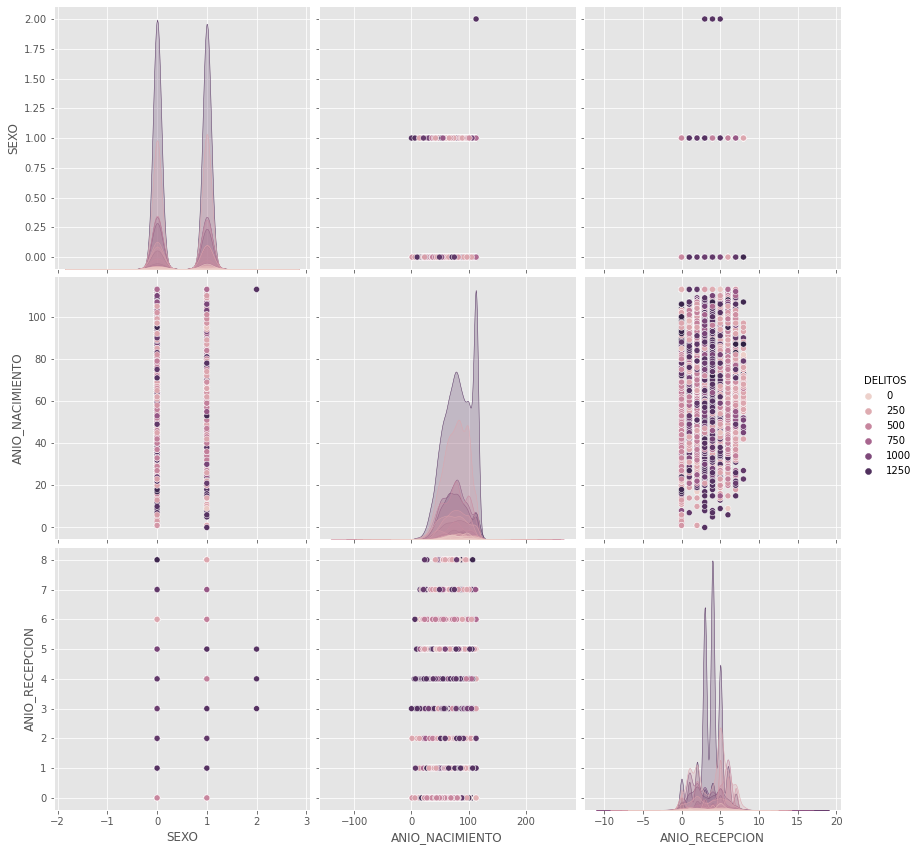

In [53]:

sb.pairplot(df.dropna(), hue='DELITOS',height=4,vars=["SEXO","ANIO_NACIMIENTO","ANIO_RECEPCION"],kind='scatter')

In [54]:
X = np.array(df[["SEXO","ANIO_NACIMIENTO","ANIO_RECEPCION"]])
y = np.array(df['DELITOS'])
X.shape

(31228, 3)

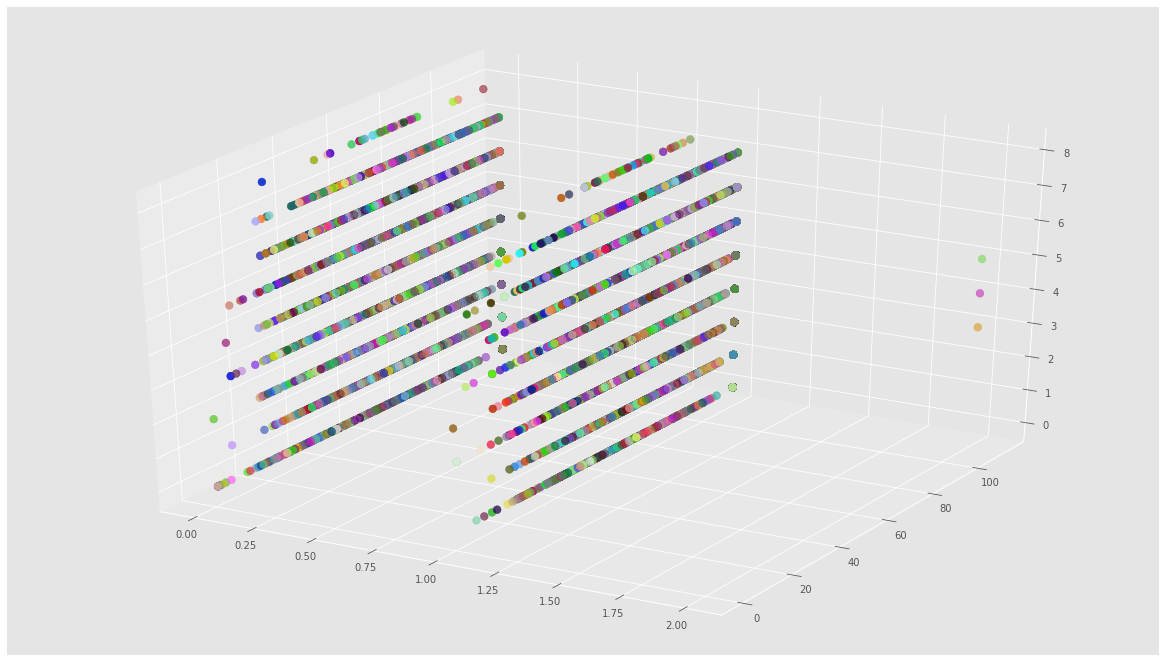

In [58]:
from random import randint

fig = plt.figure()
ax = Axes3D(fig)
asignar=[]
for row in y:
    asignar.append('#%06X' % randint(0, 0xFFFFFF))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

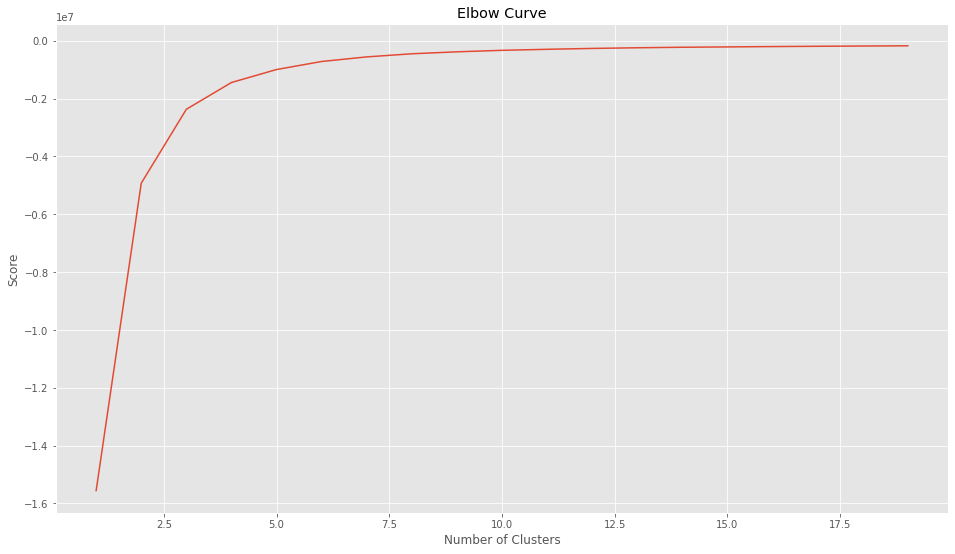

In [59]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  0.54188999  62.14076164   3.59294781]
 [  0.47799401  94.33727545   3.61706587]
 [  0.52883263  42.34060009   3.30285982]
 [  0.47251706 110.51345716   3.27179682]
 [  0.4737241   78.61963113   3.68140475]]


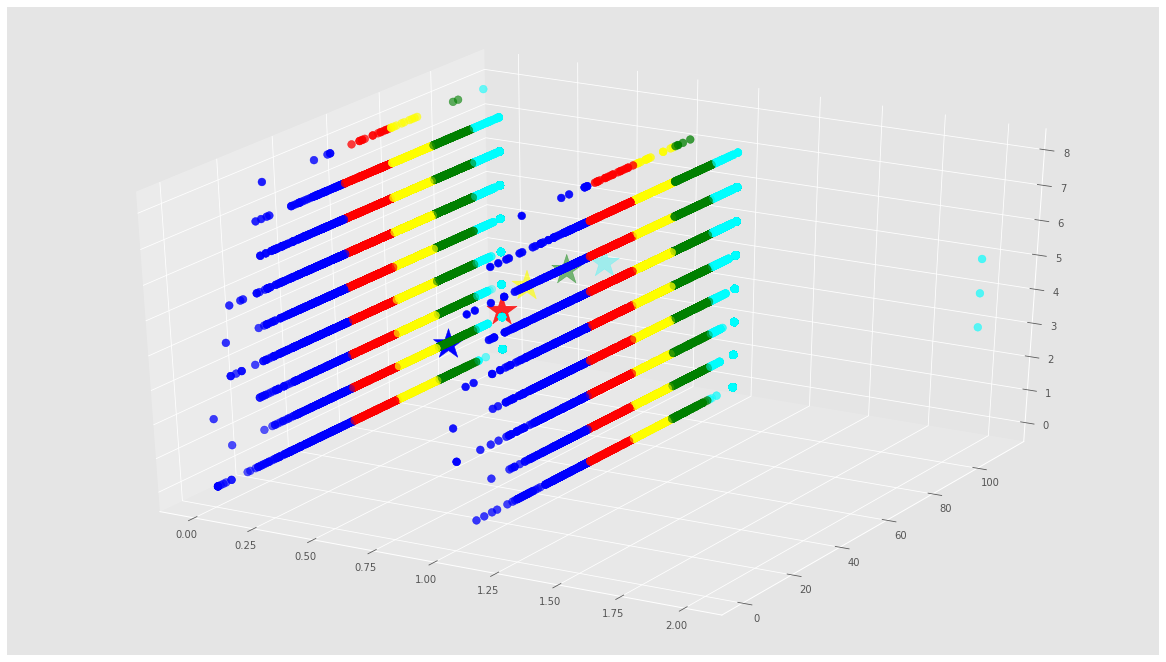

In [74]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

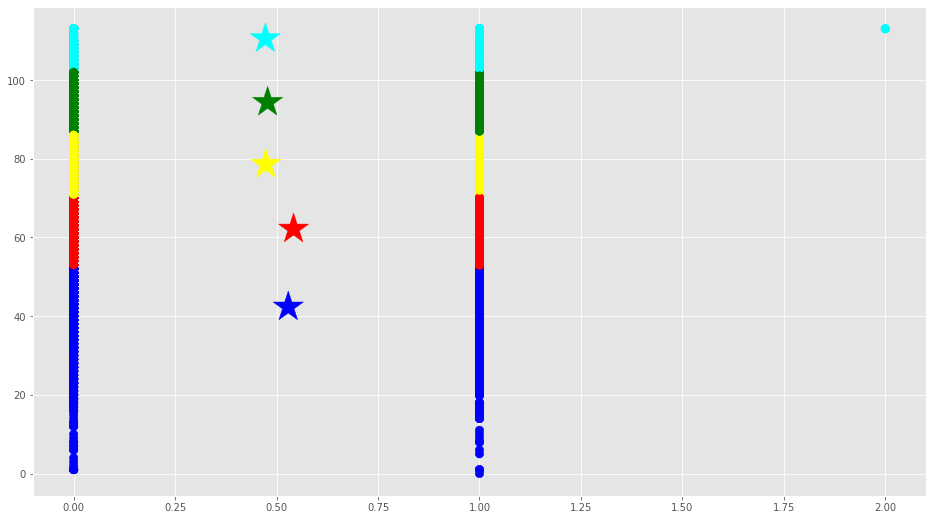

In [76]:
# Getting the values and plotting it
f1 = df['SEXO'].values
f2 = df['ANIO_NACIMIENTO'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

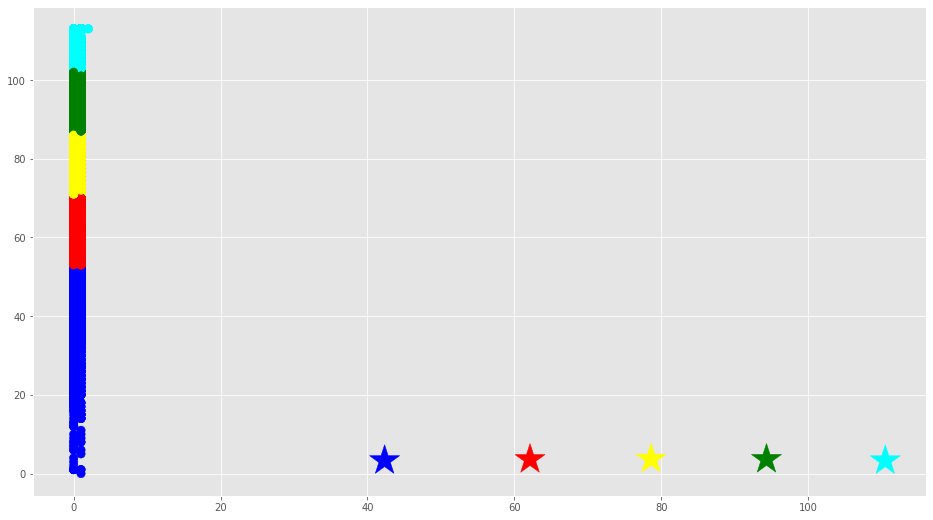

In [78]:
f1 = df['SEXO'].values
f2 = df['ANIO_NACIMIENTO'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [79]:
copy =  pd.DataFrame()
copy['SEXO']=df['SEXO'].values
copy['DELITOS']=df['DELITOS'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,7090
1,green,6680
2,blue,4266
3,cyan,5276
4,yellow,7916


# **Conclusiones**

Se toma en cuenta que cuandose visualizan los datos parece ser que el sexo tiene una gran influencia en cuanto a victimas que sufren violación o asesinatos, tambien se puede viisualizar que la edad influye en cuanto a el crimen cometido.

# **Recomendaciones y confirmaciónes**
Una de las grandes recomencaciones al momento de tratar con datos categoricos relacionados a temas de procesamiento es siempre poder convertirlos a datos numericos para una ejor interpretación.

# **Referencias**
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/